In [30]:
import theano.tensor as tt
import pysal as ps
import matplotlib.pyplot as plt
import seaborn.apionly as sns
import numpy as np
import pandas as pd
import ops
import distributions as spdist
import scipy.sparse as spar
import scipy.sparse.linalg as spla
import pymc3 as mc
%matplotlib inline

In [3]:
df = ps.pdio.read_files(ps.examples.get_path('south.shp'))
df = df.query('STATE_NAME in ("Texas", "Oklahoma", "Arkansas", "Louisiana")')

In [4]:
df.head()

,FIPSNO,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,STFIPS,COFIPS,SOUTH,HR60,...,BLK90,GI59,GI69,GI79,GI89,FH60,FH70,FH80,FH90,geometry
288,40035,Craig,Oklahoma,40,035,40035,40,35,1,4.089227,...,3.424560,0.359287,0.416758,0.358676,0.380774,11.921235,8.7,9.077454,10.746190,<pysal.cg.shapes.Polygon object at 0x7f4bf2b4c...
289,40105,Nowata,Oklahoma,40,105,40105,40,105,1,9.218289,...,3.642914,0.300158,0.410097,0.348434,0.378781,9.818679,7.9,6.892308,10.108052,<pysal.cg.shapes.Polygon object at 0x7f4bf2b4c...
290,40115,Ottawa,Oklahoma,40,115,40115,40,115,1,5.889073,...,0.615163,0.318218,0.382949,0.361050,0.385546,12.741722,10.4,11.102620,12.518889,<pysal.cg.shapes.Polygon object at 0x7f4bf2b4c...
291,40113,Osage,Oklahoma,40,113,40113,40,113,1,3.082519,...,10.109257,0.284325,0.376536,0.359410,0.381143,10.104046,7.6,8.170547,12.124602,<pysal.cg.shapes.Polygon object at 0x7f4bf2b4c...
292,40071,Kay,Oklahoma,40,071,40071,40,71,1,1.959171,...,1.781255,0.262299,0.367160,0.355859,0.376317,9.218101,7.3,8.869334,9.808418,<pysal.cg.shapes.Polygon object at 0x7f4bf2b4c...


In [25]:
df = df[df.HR90 > 0]

In [38]:
Y = np.log(df[['HR90']].values)
X = df[['GI89', 'FH90']].values
N,P = X.shape

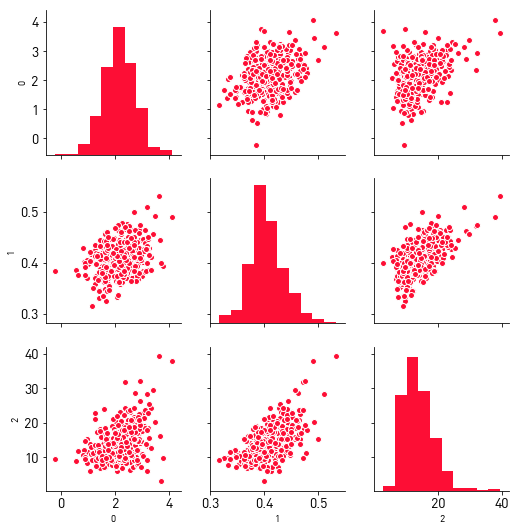

In [39]:
sns.pairplot(pd.DataFrame([Y.flatten(),*X.T]).T)

In [40]:
W = ps.weights.Queen.from_dataframe(df)

In [41]:
W.transform = 'r'

In [48]:
with mc.Model() as SE:
    a = mc.Normal('a', 0,sd=10)
    beta = mc.Normal('beta', 0,sd=10, shape=P)
    
    #sigma= mc.HalfCauchy('sigma', 5, testval=2)
    
    rho = mc.Uniform('rho', lower=-.99, upper=.99, testval=0)
    
    mu = a + tt.dot(X, beta)
    
    outcome = spdist.SAR_Error('outcome', mu=mu, scale=1, rho=rho, 
                               W=W, observed=Y.flatten(), shape=N)

In [ ]:
with SE:
    trace = mc.sample(50)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
  0%|          | 52/200000 [01:52<121:33:12,  2.19s/it]